## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [57]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')
#completa el código

In [30]:
print(traffic.head (5))
# mostrar las primeras 5 filas de traffic

  Country       City            UpdateTimeUTC  JamsDelay  TrafficIndexLive  \
0     ARE  abu-dhabi  2025-01-13 04:01:30.001      650.7              36.0   
1     ARE  abu-dhabi  2025-01-13 03:46:00.000      540.4              30.0   
2     ARE  abu-dhabi  2025-01-13 02:46:30.000       71.8               7.0   
3     ARE  abu-dhabi  2025-01-13 01:46:30.001        8.2               2.0   
4     ARE  abu-dhabi  2025-01-13 00:01:30.000        1.1               1.0   

   JamsLengthInKms  JamsCount  TrafficIndexWeekAgo     UpdateTimeUTCWeekAgo  \
0            109.1      162.0                 30.0  2025-01-06 04:01:30.000   
1            101.4      136.0                 27.0  2025-01-06 03:46:30.001   
2             18.9       23.0                  6.0  2025-01-06 02:46:30.000   
3              4.1        2.0                  2.0  2025-01-06 01:46:30.000   
4              0.2        1.0                  1.0  2025-01-06 00:01:30.000   

   TravelTimeLivePer10KmsMins  TravelTimeHistoricPer10Km

In [31]:
eco.head(5)
# mostrar las primeras 5 filas de eco

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [32]:
traffic.info(3)
# Examinar la estructura de traffic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo object (texto generico)...
- Debemos de cambiarlas a fecha para realizar los calculos correspondientes

In [33]:
eco.info(3)
# Examinar la estructura de eco


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ambas son de tipo object (texto generico)...
- Debemos convertir a 'City GDP/capita' y a 'Unemployment' a float numeros con decimales 

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [34]:

# Estandarizar los nombres de las columnas de traffic
#tu código aquí
traffic.columns = traffic.columns.astype(str)

traffic.columns = (
    traffic.columns
        .str.lower()
        .str.strip()
        .str.replace(' ', '_')
        .str.replace(r'[()./]', '', regex=True)
)

traffic = traffic.rename(columns={
    'updatetimeutc': 'update_time_utc',
    'updatetimeutcweekago': 'update_time_utc_week_ago',
    'jamsdelay': 'jams_delay',
    'trafficindexlive': 'traffic_index_live',
    'trafficindexweekago': 'traffic_index_week_ago',
    'jamslengthinkms': 'jams_length_in_kms',
    'jamscount': 'jams_count',
    'minsdelay': 'mins_delay',
    'traveltimeliveper10kmsmins': 'travel_time_live_per_10kms_mins',
    'traveltimehistoricper10kmsmins': 'travel_time_historic_per_10kms_mins'
})


traffic = traffic.loc[:, ~traffic.columns.duplicated()]
traffic = traffic.drop_duplicates()

# verificar cambios
print(traffic.columns)





Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins',
       'travel_time_historic_per_10kms_mins', 'mins_delay'],
      dtype='object')


In [35]:
# Convertir a string (por seguridad)
eco.columns = eco.columns.astype(str)

# Limpiar nombres
eco.columns = (
    eco.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('/', '_')
        .str.replace('%', 'pct')
        .str.replace('(', '', regex=False)
        .str.replace(')', '', regex=False)
        .str.replace('μg/m³', 'ugm3', regex=False)
        .str.replace('.', '', regex=False)
)

# Ajustes específicos si es necesario
eco = eco.rename(columns={
    'city_gdp_capita': 'city_gdp_per_capita',
    'population_m': 'population_m'
})

# Verificar
print(eco.columns)


Index(['year', 'city', 'country', 'city_gdp_per_capita', 'unemployment_pct',
       'pm25_μg_m³', 'population_m'],
      dtype='object')



### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [36]:
#traffic= traffic.reset_index(drop=True)
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(
    traffic['update_time_utc'], 
    errors='coerce'
)
#tu código aquí
if 'update_time_utc_week_ago' in traffic.columns:
    traffic['update_time_utc_week_ago'] = pd.to_datetime(
        traffic['update_time_utc_week_ago'], 
        errors='coerce'
    )

#tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   country                              1004464 non-null  object        
 1   city                                 1004464 non-null  object        
 2   update_time_utc                      1004464 non-null  datetime64[ns]
 3   jams_delay                           1004464 non-null  float64       
 4   traffic_index_live                   1004464 non-null  float64       
 5   jams_length_in_kms                   1004464 non-null  float64       
 6   jams_count                           1004464 non-null  float64       
 7   traffic_index_week_ago               1004464 non-null  float64       
 8   update_time_utc_week_ago             1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins      1004464 non-null  fl

In [37]:

# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_per_capita'] = (
    eco['city_gdp_per_capita']
        .astype(str)
        .str.replace('.', '', regex=False)  
#quitar separadores de miles
     .str.replace(',', '.', regex=False) 
    
#cambiar coma por punto
     .astype(float)
)
eco['unemployment_pct'] = (
    eco['unemployment_pct']
        .astype(str)
        .str.replace('%', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float))  
eco['population_m'] = (
    eco['population_m']
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float))
    
# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m'] * 1_000_000

# verificar el cambio
eco.info()
eco.head(3)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 30 non-null     int64  
 1   city                 30 non-null     object 
 2   country              30 non-null     object 
 3   city_gdp_per_capita  30 non-null     float64
 4   unemployment_pct     30 non-null     float64
 5   pm25_μg_m³           30 non-null     object 
 6   population_m         30 non-null     float64
 7   population           30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_per_capita,unemployment_pct,pm25_μg_m³,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [38]:
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins',
       'travel_time_historic_per_10kms_mins', 'mins_delay'],
      dtype='object')

In [39]:
traffic['update_time_utc'] = pd.to_datetime(
    traffic['update_time_utc'], 
    errors='coerce'
)
traffic['year'] = traffic['update_time_utc'].dt.year
print (traffic)


        country       city         update_time_utc  jams_delay  \
0           ARE  abu-dhabi 2025-01-13 04:01:30.001       650.7   
1           ARE  abu-dhabi 2025-01-13 03:46:00.000       540.4   
2           ARE  abu-dhabi 2025-01-13 02:46:30.000        71.8   
3           ARE  abu-dhabi 2025-01-13 01:46:30.001         8.2   
4           ARE  abu-dhabi 2025-01-13 00:01:30.000         1.1   
...         ...        ...                     ...         ...   
1004459     ZAF   pretoria 2024-10-01 12:31:30.000       195.1   
1004460     ZAF   pretoria 2024-10-01 11:31:30.000        78.3   
1004461     ZAF   pretoria 2024-10-01 10:01:30.000        85.0   
1004462     ZAF   pretoria 2024-10-01 09:01:30.000        68.1   
1004463     ZAF   pretoria 2024-10-01 08:46:30.000        67.7   

         traffic_index_live  jams_length_in_kms  jams_count  \
0                      36.0               109.1       162.0   
1                      30.0               101.4       136.0   
2                 

In [40]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year'] == 2024].copy()
eco_2024 = eco[eco['year'] == 2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_per_capita,unemployment_pct,pm25_μg_m³,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [41]:
# Agrupar por ciudad, país y año y calcular promedios de las métricas de tráfico
traffic_city_year_2024 = traffic_2024.groupby(
    ['city', 'country', 'year'], 
    as_index=False
).agg({
    'jams_delay': 'mean',
    'traffic_index_live': 'mean',
    'jams_length_in_kms': 'mean',
    'jams_count': 'mean',
    'mins_delay': 'mean',
    'travel_time_live_per_10kms_mins': 'mean',
    'travel_time_historic_per_10kms_mins': 'mean'
})

# Ver qué ciudad tiene mayor promedio de congestión
traffic_city_year_2024.sort_values("jams_delay", ascending=False)


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [42]:

traffic_city_year_2024.sort_values("jams_delay", ascending=False)
# tu código aquí


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es mexico-city


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


In [43]:
eco_2024.columns

Index(['year', 'city', 'country', 'city_gdp_per_capita', 'unemployment_pct',
       'pm25_μg_m³', 'population_m', 'population'],
      dtype='object')

In [47]:
country_dict = {
    'Argentina': 'ARG',
    'Brazil': 'BRA',
    'Spain': 'ESP',
    'Germany': 'DEU',
    'Denmark': 'DNK',
    'United Arab Emirates': 'ARE',
    'Turkey': 'TUR'
}
eco_2024['country'] = eco_2024['country'].map(country_dict)
eco_2024['country'].unique()

array(['ARG', 'BRA', nan], dtype=object)

In [49]:
data_2024 = traffic_city_year_2024.merge(
    eco_2024,
    on=['city', 'country', 'year'],
    how='inner'
)
print(data_2024.shape)




(10, 15)


In [50]:
print(traffic_city_year_2024.columns.tolist())

['city', 'country', 'year', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'mins_delay', 'travel_time_live_per_10kms_mins', 'travel_time_historic_per_10kms_mins']


In [54]:
eco_2024.columns

Index(['year', 'city', 'country', 'city_gdp_per_capita', 'unemployment_pct',
       'pm25_μg_m³', 'population_m', 'population'],
      dtype='object')

<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [55]:

# Columnas de tráfico
left_cols = ['city','country',
             'year',
             'jams_delay',
             'traffic_index_live',
             'jams_length_in_kms',
             'jams_count',
             'mins_delay',
             'travel_time_historic_per_10kms_mins'
            ]

traffic_2024_small = traffic_city_year_2024[left_cols].copy()

right_cols = [
    'city',
    'country',
    'year',
    'city_gdp_per_capita'
]

eco_2024_small = eco_2024[right_cols].copy()


# Merge inner
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city','country','year'], how='inner')

# Revisar primeras filas
merged.head(5)


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_historic_per_10kms_mins,city_gdp_per_capita
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,17.817311,11124.0
1,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.145216,16251.0
2,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.491349,18117.0
3,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.118736,12381.0
4,fortaleza,BRA,2024,82.813181,15.896749,11.205844,24.644991,0.081618,19.185554,8512.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

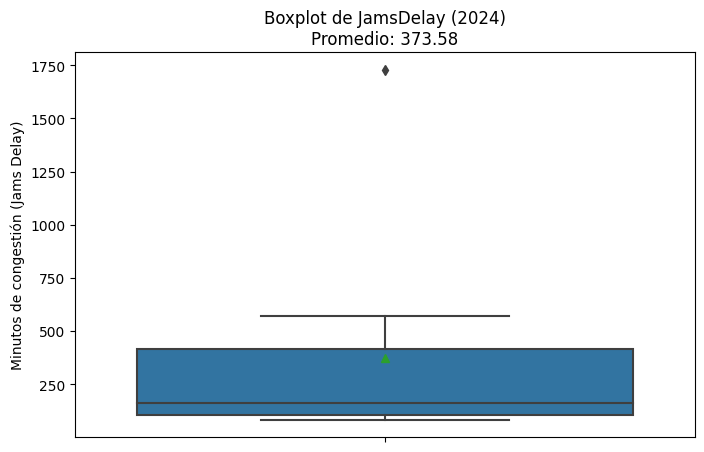

In [59]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico
plt.figure(figsize=(8,5))
sns.boxplot(
    y=merged['jams_delay'],
    showmeans=True
)

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.ylabel('Minutos de congestión (Jams Delay)')
plt.show()

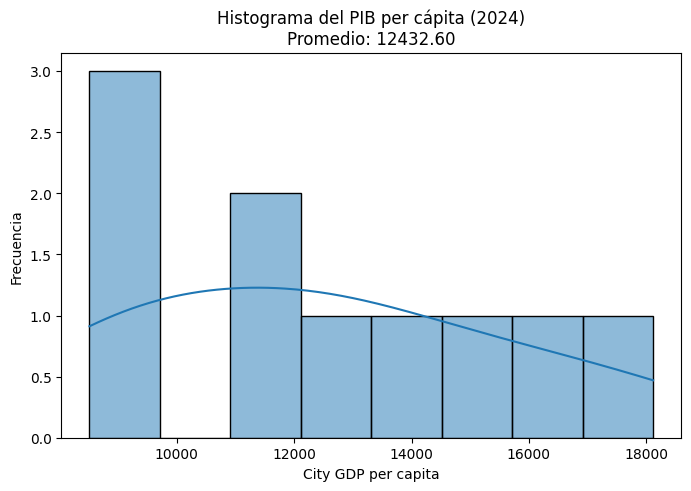

In [60]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
plt.figure(figsize=(8,5))

sns.histplot(
    merged['city_gdp_per_capita'],
    bins=8,
    kde=True
)

# calcular promedio
mean_gdp = merged['city_gdp_per_capita'].mean()

plt.title(f'Histograma del PIB per cápita (2024)\nPromedio: {mean_gdp:.2f}')
plt.xlabel('City GDP per capita')
plt.ylabel('Frecuencia')

plt.show()



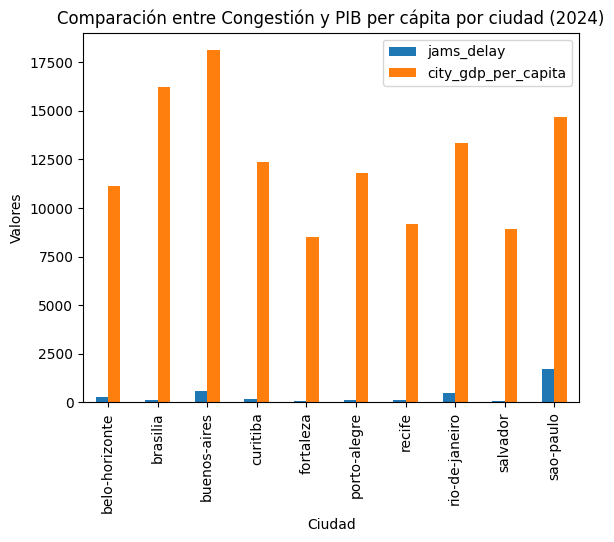

In [64]:



# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])

merged.plot(
    x='city',
    y=['jams_delay', 'city_gdp_per_capita'],
    kind='bar'
)

plt.title('Comparación entre Congestión y PIB per cápita por ciudad (2024)')
plt.ylabel('Valores')
plt.xlabel('Ciudad')

plt.xticks(rotation=90)   # Rotar etiquetas
plt.show()

#plt.show()




**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios:


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [62]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

In [63]:
merged[['city','jams_delay','city_gdp_per_capita']].sort_values(
    by='jams_delay',
    ascending=False
)
merged[['city','jams_delay','city_gdp_per_capita']].sort_values(
    by='city_gdp_per_capita'
)

,city,jams_delay,city_gdp_per_capita
4,fortaleza,82.813181,8512.0
8,salvador,86.400000,8899.0
6,recife,112.755551,9189.0
0,belo-horizonte,263.047879,11124.0
5,porto-alegre,139.382830,11801.0
3,curitiba,183.469274,12381.0
7,rio-de-janeiro,466.064706,13349.0
9,sao-paulo,1729.189270,14703.0
1,brasilia,101.576326,16251.0
2,buenos-aires,571.089593,18117.0


Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?

- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?



---

# 🧾 Respuestas

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: **El análisis realizado para el año 2024 no muestra una relación negativa clara entre congestión vehicular y productividad económica (PIB per cápita) en las ciudades estudiadas. Es decir, las ciudades con mayores niveles de tráfico no necesariamente presentan menores niveles de ingreso per cápita.
Por ejemplo, São Paulo registra el nivel más alto de congestión dentro del grupo analizado; sin embargo, no es la ciudad con menor PIB per cápita. Asimismo, Buenos Aires presenta altos niveles de congestión y, al mismo tiempo, el PIB per cápita más alto del conjunto evaluado.
Las ciudades con menores niveles de PIB per cápita no coinciden con las que presentan mayor congestión, lo que sugiere que, en este conjunto de datos, la movilidad urbana y la productividad económica no muestran una relación directa o lineal**

- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.
**En el ámbito de la movilidad, se utilizaron indicadores como jams_delay (minutos promedio de retraso por congestión) y los tiempos de viaje por cada 10 kilómetros. Estas variables permiten medir el nivel de tráfico y la eficiencia del desplazamiento dentro de cada ciudad. Son relevantes porque altos niveles de congestión pueden generar pérdidas de tiempo, mayores costos operativos y menor eficiencia en la actividad económica.
En el ámbito económico, se empleó el city_gdp_per_capita (PIB per cápita de la ciudad), que representa el nivel promedio de producción o ingreso por habitante. Este indicador es clave para evaluar el desempeño económico y el nivel de desarrollo relativo de cada ciudad.**

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.
  **El análisis se realizó utilizando información correspondiente al año 2024. Tras el proceso de limpieza, estandarización y unión de los conjuntos de datos, se obtuvo una muestra final de 10 ciudades.
Las ciudades incluidas pertenecen a dos países: Brasil y Argentina. La mayoría de las observaciones corresponden a ciudades brasileñas, además de Buenos Aires en Argentina**

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).
**Primero, se realizó la limpieza de los datos. Se corrigieron nombres de columnas, se estandarizaron los formatos de fecha para extraer el año 2024 y se ajustaron los códigos de país para que coincidieran en ambos datasets. También se revisaron posibles errores en nombres de ciudades.
Después, los datos de tráfico se agruparon por ciudad y año, calculando promedios para obtener una sola medida representativa por ciudad en 2024. Esto permitió comparar las ciudades de forma más clara.
Luego, se unieron los datos de tráfico y economía mediante una unión tipo INNER, lo que aseguró que solo se analizaran las ciudades que tenían información disponible en ambos conjuntos de datos.
Finalmente, se utilizaron gráficos (boxplot, histograma y gráfico de barras) para observar la distribución de los datos, detectar posibles valores extremos y analizar si existía alguna relación general entre congestión y PIB per cápita.**

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.
  **El análisis muestra que no existe una relación directa y clara entre los niveles de congestión y el PIB per cápita en las ciudades evaluadas. Las ciudades con mayor tráfico no necesariamente presentan menor productividad económica.**

  **También se identificaron valores extremos en los niveles de congestión, especialmente en São Paulo, que podrían considerarse outliers y que podrían requerir una revisión adicional para confirmar la consistencia de los datos o analizar factores estructurales específicos de esa ciudad.**

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?

**En el conjunto de datos trabajado no se incluyen Bogotá ni Lima, por lo que no es posible evaluarlas dentro de este análisis. Entre las ciudades disponibles, Buenos Aires presenta altos niveles de congestión, pero también el PIB per cápita más alto del grupo, por lo que no cumple con la condición de baja productividad económica.**

**La ciudad con mayor nivel de congestión es São Paulo. Aunque no presenta el PIB más bajo, su nivel extremo de tráfico sugiere que podría considerarse prioritaria para inversión en infraestructura de transporte, especialmente desde una perspectiva de eficiencia urbana y reducción de tiempos de desplazamiento.
Se recomienda ampliar el análisis incorporando más ciudades (incluyendo Bogotá y Lima), así como variables adicionales como crecimiento poblacional, calidad del transporte público e inversión en infraestructura, para obtener una evaluación más completa antes de tomar decisiones estratégicas.**

